In [25]:
import numpy as np
import pandas as pd
from pprint import pprint
import math
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("resources/dataset_train.csv")
m = data['Index'].shape[0]
m

1600

In [6]:
data.head(10)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.0,628.046051,-4.861976,-6.280461,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.0,411.412727,5.931832,-4.114127,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.0,496.394945,-5.215891,-4.963949,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.0,527.193585,7.922205,-5.271936,3.356,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


In [14]:
y = list(data["Hogwarts House"])
y = [a[0] for a in y]
y = np.array(y)
y[:10]

array(['R', 'S', 'R', 'G', 'G', 'S', 'G', 'H', 'G', 'H'], dtype='<U1')

In [23]:
X0 = np.ones(m)
X = np.array(data[["Arithmancy","Astronomy"]])
X = np.c_[X0, X]
X[:10]

array([[ 1.00000000e+00,  5.83840000e+04, -4.87886086e+02],
       [ 1.00000000e+00,  6.72390000e+04, -5.52060507e+02],
       [ 1.00000000e+00,  2.37020000e+04, -3.66076117e+02],
       [ 1.00000000e+00,  3.26670000e+04,  6.97742809e+02],
       [ 1.00000000e+00,  6.01580000e+04,  4.36775204e+02],
       [ 1.00000000e+00,  2.12090000e+04, -6.13687160e+02],
       [ 1.00000000e+00,  4.91670000e+04,  6.28046051e+02],
       [ 1.00000000e+00,  3.30100000e+04,  4.11412727e+02],
       [ 1.00000000e+00,  2.02780000e+04,  4.96394945e+02],
       [ 1.00000000e+00,  4.63160000e+04,  5.27193585e+02]])

In [30]:
def visualize_before(x, y, color):
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(x, y, c=color)
    #plt.plot(x, x * slop + intercept, 'b', linewidth=0.2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()


In [31]:
theta = np.zeros(15)
theta


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

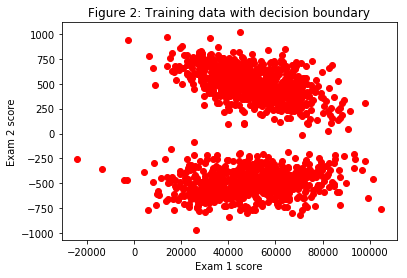

In [32]:
visualize_before(X[:,1], X[:,2],"red")

In [34]:
def get_intercept_slope(theta):
    x_1 = 0
    intercept = 0
    pred = 0
    while pred < 0.5:
        p = [1, x_1, intercept]
        intercept += 0.1
        pred = hipothesis_log(p, theta)
    x_1 = 30
    x_2 = 40
    y_1 = 0
    y_2 = 0
    pred = 0
    while pred < 0.5:
        p = [1, x_1, y_1]
        y_1 += 0.1
        pred = hipothesis_log(p, theta)
    pred = 0
    while pred < 0.5:
        p = [1, x_2, y_2]
        y_2 += 0.1
        pred = hipothesis_log(p, theta)
    slop = (x_1 - x_2) / (y_1 - y_2)
    return (intercept, slop)




In [39]:
intercept, slop = get_intercept_slope(theta)

NameError: name 'hipothesis_log' is not defined

In [36]:
def visualize_after(x, y, color, theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(x, y, c=color)
    #plt.plot(x, x * slop + intercept, 'b', linewidth=0.2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()


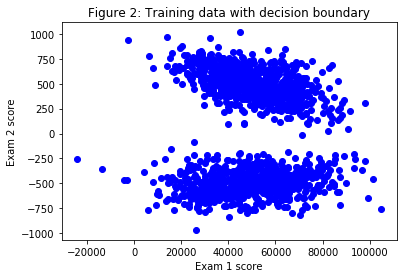

In [38]:
visualize_after(X[:,1], X[:,2], "blue", theta)